# A1 - Data curation assignment - Data512

This notebook contains data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.

1.) The Legacy Pagecounts API endpoint provides access to desktop and mobile traffic data from December 2007 through July 2016

2.) The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

Goal of this notebook is to analyze the English wikipedia over time and visualizing it

# Step 1 : Acquiring data from RestAPI and storing it in JSON format

### Importing all the packages

In [34]:

# import the required libraries
import json
import requests
import csv
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
count_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'
view_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

### Setting Parameters to make Page count API calls

In [36]:
params_counts_allsites = {'project' : 'en.wikipedia.org',
            'access' : 'all-sites',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020083100'
            }

params_counts_mobilesites = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020083100'
            }
    
params_counts_desktopsites = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020083100'
            }

### Setting parameters to make Page View API calls

In [37]:
params_views_desktop = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020083100'
            }

params_views_mobileweb = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020083100'
            }

params_views_mobileapp = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020083100'
            }

### Getting the data from Page count API and saving it in JSON format in the directory 

In [38]:

api_call = requests.get(count_endpoint.format(**params_counts_allsites))
response_counts_allsites =api_call.json()
with open('pagecounts_all-sites_200801-202008.json', 'w') as f:
    json.dump(response_counts_allsites, f)
    
api_call = requests.get(count_endpoint.format(**params_counts_mobilesites))
response_counts_mobilesite = api_call.json()
with open('pagecounts_mobile-site_200801-202008.json', 'w') as f:
    json.dump(response_counts_mobilesite, f)


api_call = requests.get(count_endpoint.format(**params_counts_desktopsites))
response_counts_desktopsite = api_call.json()
with open('pagecounts_desktop-site_200801-202008.json', 'w') as f:
    json.dump(response_counts_desktopsite, f)

### Getting the data from Page View API and saving it in JSON format in the directory¶

In [39]:
api_call = requests.get(view_endpoint.format(**params_views_desktop))
response_views_desktop = api_call.json()
with open('pageviews_all-sites_201507-202008.json', 'w') as f:
    json.dump(response_views_desktop, f)
    
api_call = requests.get(view_endpoint.format(**params_views_mobileweb))
response_views_mobileweb = api_call.json()
with open('pageviews_mobile-web_201507-202008.json', 'w') as f:
    json.dump(response_views_mobileweb, f)

api_call = requests.get(view_endpoint.format(**params_views_mobileapp))
response_views_mobileapp = api_call.json()
with open('pageviews_mobile-app_201507-202008.json', 'w') as f:
    json.dump(response_views_mobileapp, f)

In [40]:

# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_count_df1 = pd.DataFrame(response_counts_allsites['items'])
resp_count_df2 = pd.DataFrame(response_counts_mobilesite['items'])
resp_count_df3 = pd.DataFrame(response_counts_desktopsite['items'])

# get items and convert the responses into dictionary to access individual objects
resp_count_dict1 = response_counts_allsites['items']
resp_count_dict2 = response_counts_mobilesite['items']
resp_count_dict3 = response_counts_desktopsite['items']

# create empty list
resp_count_all_view = []
resp_count_time = []
resp_count_mobile_view = []
resp_count_desktop_view = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_count_df1)):
    resp_count_all_view.append(resp_count_dict1[x]['count'])
    resp_count_time.append(resp_count_dict1[x]['timestamp'])
    resp_count_desktop_view.append(resp_count_dict3[x]['count'])
    resp_count_mobile_view.append(resp_count_dict1[x]['count']-resp_count_dict3[x]['count'])
   
#write the list in a single dataframe
pagecount = pd.DataFrame(
    {'Date':resp_count_time,
     'pagecount_all_views': resp_count_all_view,
     'pagecount_desktop_views': resp_count_desktop_view,
     'pagecount_mobile_views': resp_count_mobile_view
    })

# Step 2 : Processing the data and preparing it for plotting in desired format 

### Loading JSON files and converting them in panda dataframe to make analyze it

In [41]:
# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_view_df1 = pd.DataFrame(response_views_desktop['items'])
resp_view_df2 = pd.DataFrame(response_views_mobileweb['items'])
resp_view_df3 = pd.DataFrame(response_views_mobileapp['items'])

# get items and convert the responses into dictionary to access individual objects
resp_view_dict1 = response_views_desktop['items']
resp_view_dict2 = response_views_mobileweb['items']
resp_view_dict3 = response_views_mobileapp['items']

# create empty list
resp_view_desktop = []
resp_view_time = []
resp_view_mobile = []
resp_view_all = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_view_df1)):
    resp_view_desktop.append(resp_view_dict1[x]['views'])
    resp_view_time.append(resp_view_dict1[x]['timestamp'])
    resp_view_mobile.append(resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    resp_view_all.append(resp_view_dict1[x]['views']+resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    
# write the list in a single dataframe    
pageview = pd.DataFrame(
    {'Date':resp_view_time,
     'pageview_all_views': resp_view_all,
     'pageview_desktop_views': resp_view_desktop,
     'pageview_mobile_views': resp_view_mobile
    })

### For all data, separating the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH)

In [42]:

final_csv_df = pagecount.merge(pageview, left_on='Date', right_on='Date', how='outer').fillna(0)
final_csv_df['year'] = final_csv_df['Date'].str[0:4]
final_csv_df['month'] = final_csv_df['Date'].str[4:6]
final_csv_df['timestamp'] = final_csv_df['Date'].str[0:8]
final_csv_df['timestamp'] = final_csv_df['timestamp'].apply(pd.to_datetime)
final_csv_df = final_csv_df[['year', 'month', 'timestamp','pagecount_all_views', 'pagecount_desktop_views', 
'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]

In [43]:
final_csv_df.to_csv('en-wikipedia_traffic_200801-202008.csv', sep=',')

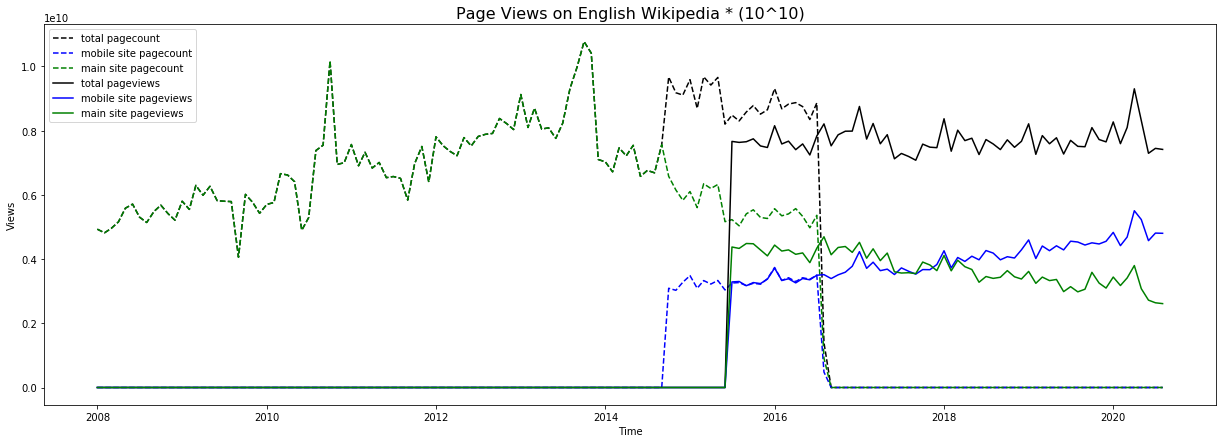

In [44]:
# Create the plot
fig, ax = plt.subplots(figsize=(21,7))
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_all_views'], '--', color='black', label='total pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_mobile_views'], '--', color='blue', label='mobile site pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_desktop_views'], '--',color='green', label = 'main site pagecount')

ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_all_views'], '-', color='black', label='total pageviews')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_mobile_views'], '-', color='blue', label='mobile site pageviews' )
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_desktop_views'], '-',color='green', label='main site pageviews')

plt.title('Page Views on English Wikipedia * (10^10)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Views')
ax.legend(loc='upper left')

In [45]:
fig.savefig('PlotPageviewsEN_overlap.png')